In [128]:
import pymysql
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from datetime import datetime
import seaborn as sns

In [129]:
set_matplotlib_formats('retina')
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [130]:
db = pymysql.connect(user='root', host='localhost', passwd='011936', database = 'assets', port = 3306)
cursor = db.cursor()

In [131]:
sql = 'select * from asset_d where gold > 1700 order by date desc;'

pd.read_sql(sql, db)

,date,gold,silver,oil,kospi,nasdaq,tesla,bitcoin
0,2021-02-10,1843.25,27.098,58.35,3100.58,13655.30,804.82,45242.1
1,2021-02-09,1837.50,27.402,58.36,3084.67,13687.10,849.46,46508.6
2,2021-02-08,1834.20,27.576,57.97,3091.24,13695.00,863.42,46395.7
3,2021-02-05,1813.00,27.019,56.85,3120.63,13604.00,852.23,38297.6
4,2021-02-04,1791.20,26.234,56.23,3087.55,13560.90,849.99,36982.1
...,...,...,...,...,...,...,...,...
371,2011-08-12,1740.20,39.101,85.38,1793.31,2182.05,5.26,9.5
372,2011-08-11,1748.80,38.656,85.72,1817.44,2167.07,5.06,9.5
373,2011-08-10,1781.30,39.325,82.89,1806.24,2073.09,4.76,10.0
374,2011-08-09,1740.00,37.877,79.30,1801.35,2160.79,5.01,10.0


In [132]:
db = pymysql.connect(user='root', host='localhost', passwd='011936', database = 'gmarket', port = 3306)
cursor = db.cursor()

In [133]:
sql = 'select * from ranking'
pd.read_sql(sql,db).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12018 entries, 0 to 12017
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            12018 non-null  int64 
 1   main_category  12018 non-null  object
 2   sub_category   12018 non-null  object
 3   item_ranking   12018 non-null  int64 
 4   item_code      12018 non-null  object
dtypes: int64(2), object(3)
memory usage: 469.6+ KB


In [134]:
sql = "select items.provider as 생산자, count(*)  as 갯수 from ranking inner join items on items.item_code = ranking.item_code where ranking.main_category = '패션의류' group by items.provider having COUNT(*) > 10 order by count(*) desc;"
pd.read_sql(sql, db)

,생산자,갯수
0,롯데백화점1관,39
1,신세계백화점,33
2,롯데 홈쇼핑,32
3,GS홈쇼핑,30
4,지오다노-본사직영샵,19
5,롯데아이몰,19
6,신세계TV쇼핑,18
7,제이엔지코리아,16
8,한스속옷,13
9,갤러리아백화점,13


In [135]:
sql = "select i.provider, count(*) from ranking r inner join items  i on i.item_code = r.item_code where r.main_category like '신발%' group by i.provider having count(*) >= 10 order by count(*) desc;"
pd.read_sql(sql, db).head(10)

,provider,count(*)
0,롯데백화점1관,45
1,롯데아이몰,43
2,신세계몰,27
3,GS홈쇼핑,25
4,스마일배송,23
5,신세계백화점,21
6,페이퍼플레인,18
7,롯데백화점2관,17
8,홈앤쇼핑MALL,17
9,롯데ON,16


In [136]:
sql = """
select max(i.dis_price), min(i.dis_price), avg(i.dis_price) from ranking r inner join items i on i.item_code = r.item_code 
where r.main_category like '화장품%';
"""
pd.read_sql(sql, db)

,max(i.dis_price),min(i.dis_price),avg(i.dis_price)
0,1999740,900,31986.7222


In [137]:
sql = "select * from items inner join ranking on items.item_code = ranking.item_code where items.provider != ''"
df = pd.read_sql(sql,db)

In [138]:
df = df.iloc[:,:-1]

In [139]:
df.to_csv('지마켓 베스트 상품 데이터.csv', encoding = 'utf-8-sig')

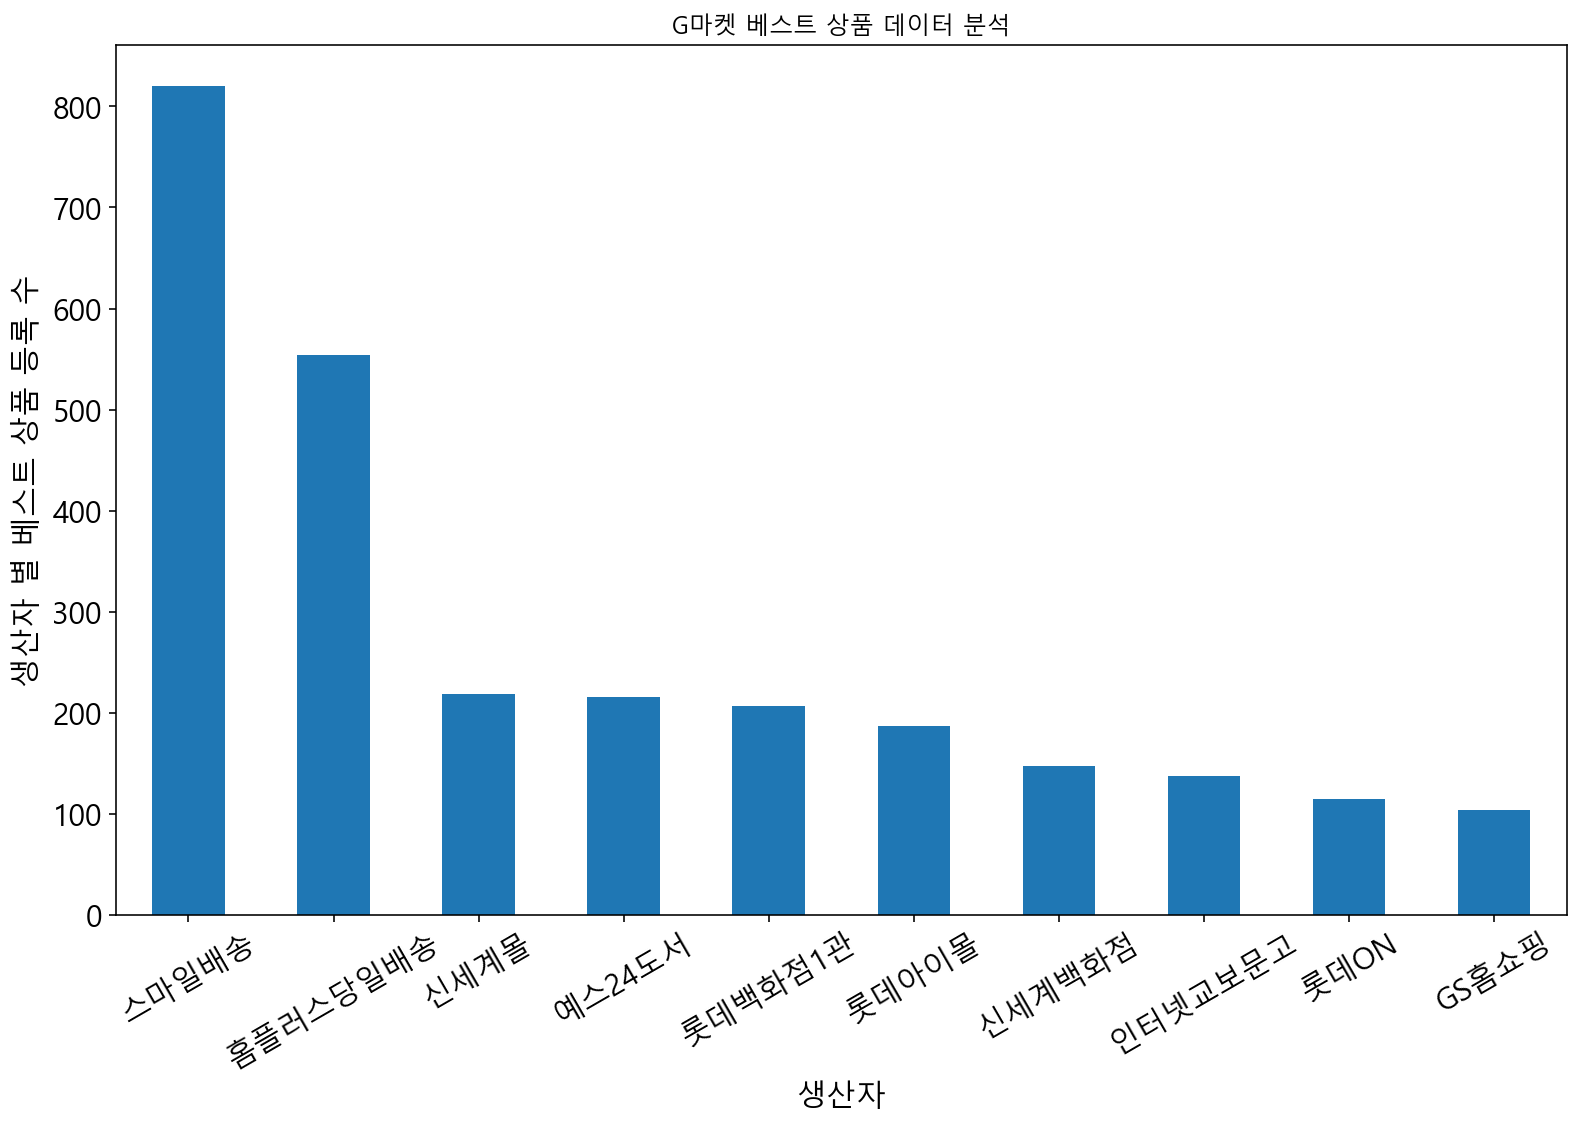

In [140]:
df.provider.value_counts()[:].head(10).plot.bar(figsize=(13,8), title = 'G마켓 베스트 상품 데이터 분석', fontsize = 15, rot=30)
plt.xlabel('생산자', fontsize = 15)
plt.ylabel('생산자 별 베스트 상품 등록 수', fontsize = 15)
plt.savefig('생산자 상품 수 비교.png')

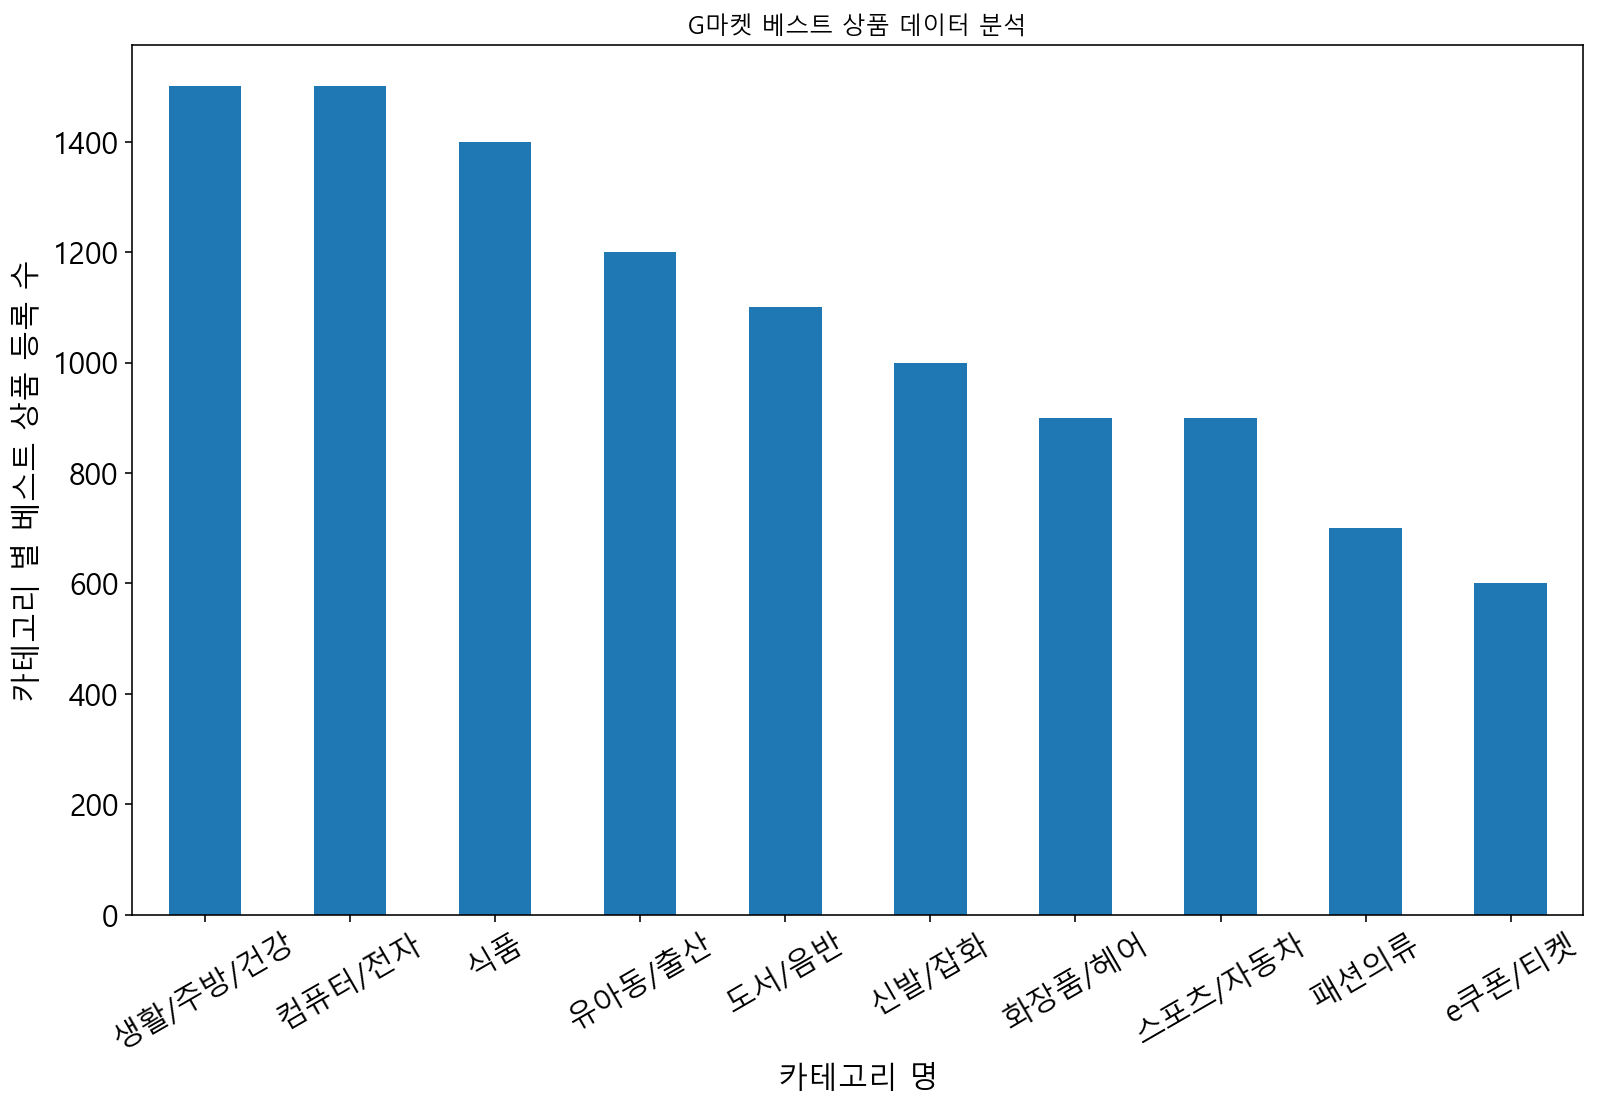

In [141]:
df.main_category.value_counts().head(10).plot.bar(figsize=(13,8), title = 'G마켓 베스트 상품 데이터 분석', fontsize = 15, rot=30)
plt.xlabel('카테고리 명', fontsize = 15)
plt.ylabel('카테고리 별 베스트 상품 등록 수', fontsize = 15)
plt.savefig('카테고리 명 비교.png')

In [33]:
sqli = 'select * from items'
sqlr = 'select * from ranking'
pd.read_sql(sqli,db).head(2)

,item_code,title,ori_price,dis_price,discount_percent,provider
0,101481811,[상우산업]에칭 300 전신거울 / 벽걸이거울 / 무료배송,18900,18600,1,(주)루미나스거울나라
1,102001982,북유럽 암막커튼 중형 거실 창문 커텐 150X232 2장,39800,36620,7,(커텐클럽)


In [34]:
pd.read_sql(sqlr,db).head(2)

,num,main_category,sub_category,item_ranking,item_code
0,1,ALL,ALL,1,2007453180
1,2,ALL,ALL,2,1899023511


In [36]:
sql = "select main_category, count(*) from ranking where item_code in (select item_code from items where dis_price > 100000) group by main_category"
pd.read_sql(sql,db)

,main_category,count(*)
0,스포츠/자동차,169
1,여행,115
2,컴퓨터/전자,710
3,신발/잡화,203
4,가구/침구,74
5,생활/주방/건강,43
6,화장품/헤어,21
7,도서/음반,92
8,e쿠폰/티켓,64
9,유아동/출산,91


In [39]:
sql = "select r.main_category, r.sub_category, avg(i.dis_price), avg(i.discount_percent) from ranking r inner join items i on r.item_code = i.item_code group by r.main_category, r.sub_category"
pd.read_sql(sql,db)

,main_category,sub_category,avg(i.dis_price),avg(i.discount_percent)
0,ALL,ALL,52903.3,24.73
1,패션의류,ALL,20353.3,58.12
2,패션의류,브랜드 여성의류,52498.6,17.94
3,패션의류,브랜드 남성의류,46696.9,20.24
4,패션의류,브랜드 진/캐쥬얼,30813.7,28.26
...,...,...,...,...
116,e쿠폰/티켓,외식,25121.0,5.72
117,e쿠폰/티켓,온라인컨텐츠,86171.7,16.28
118,e쿠폰/티켓,생활쿠폰,25567.0,2.59
119,e쿠폰/티켓,상품권,76980.0,0.00


In [40]:
sql = "select i.provider, count(*), avg(i.dis_price), avg(i.discount_percent) from ranking r inner join items i on r.item_code = i.item_code group by i.provider order by count(*) desc"
pd.read_sql(sql,db)

,provider,count(*),avg(i.dis_price),avg(i.discount_percent)
0,스마일배송,820,40492.9634,9.2427
1,홈플러스당일배송,554,11947.4188,1.6354
2,,303,338252.2442,0.2937
3,신세계몰,218,135673.8532,9.7110
4,예스24도서,215,27667.9535,0.2326
...,...,...,...,...
3163,제노컴퍼니,1,14060.0000,5.0000
3164,순천만수산.,1,19410.0000,22.0000
3165,GL트레이드,1,4900.0000,2.0000
3166,SRKOREA,1,18900.0000,6.0000


In [98]:
sql = "select i.provider as 판매자, avg(i.dis_price) as 평균할인후가격, avg(i.discount_percent) as 평균할인율, count(*) as 베스트상품수 from ranking r inner join items i on r.item_code = i.item_code group by i.provider having count(*) >= 100 order by count(*) desc"
df = pd.read_sql(sql,db)

In [99]:
df = df.iloc[:-3,:].drop(2, axis = 0)

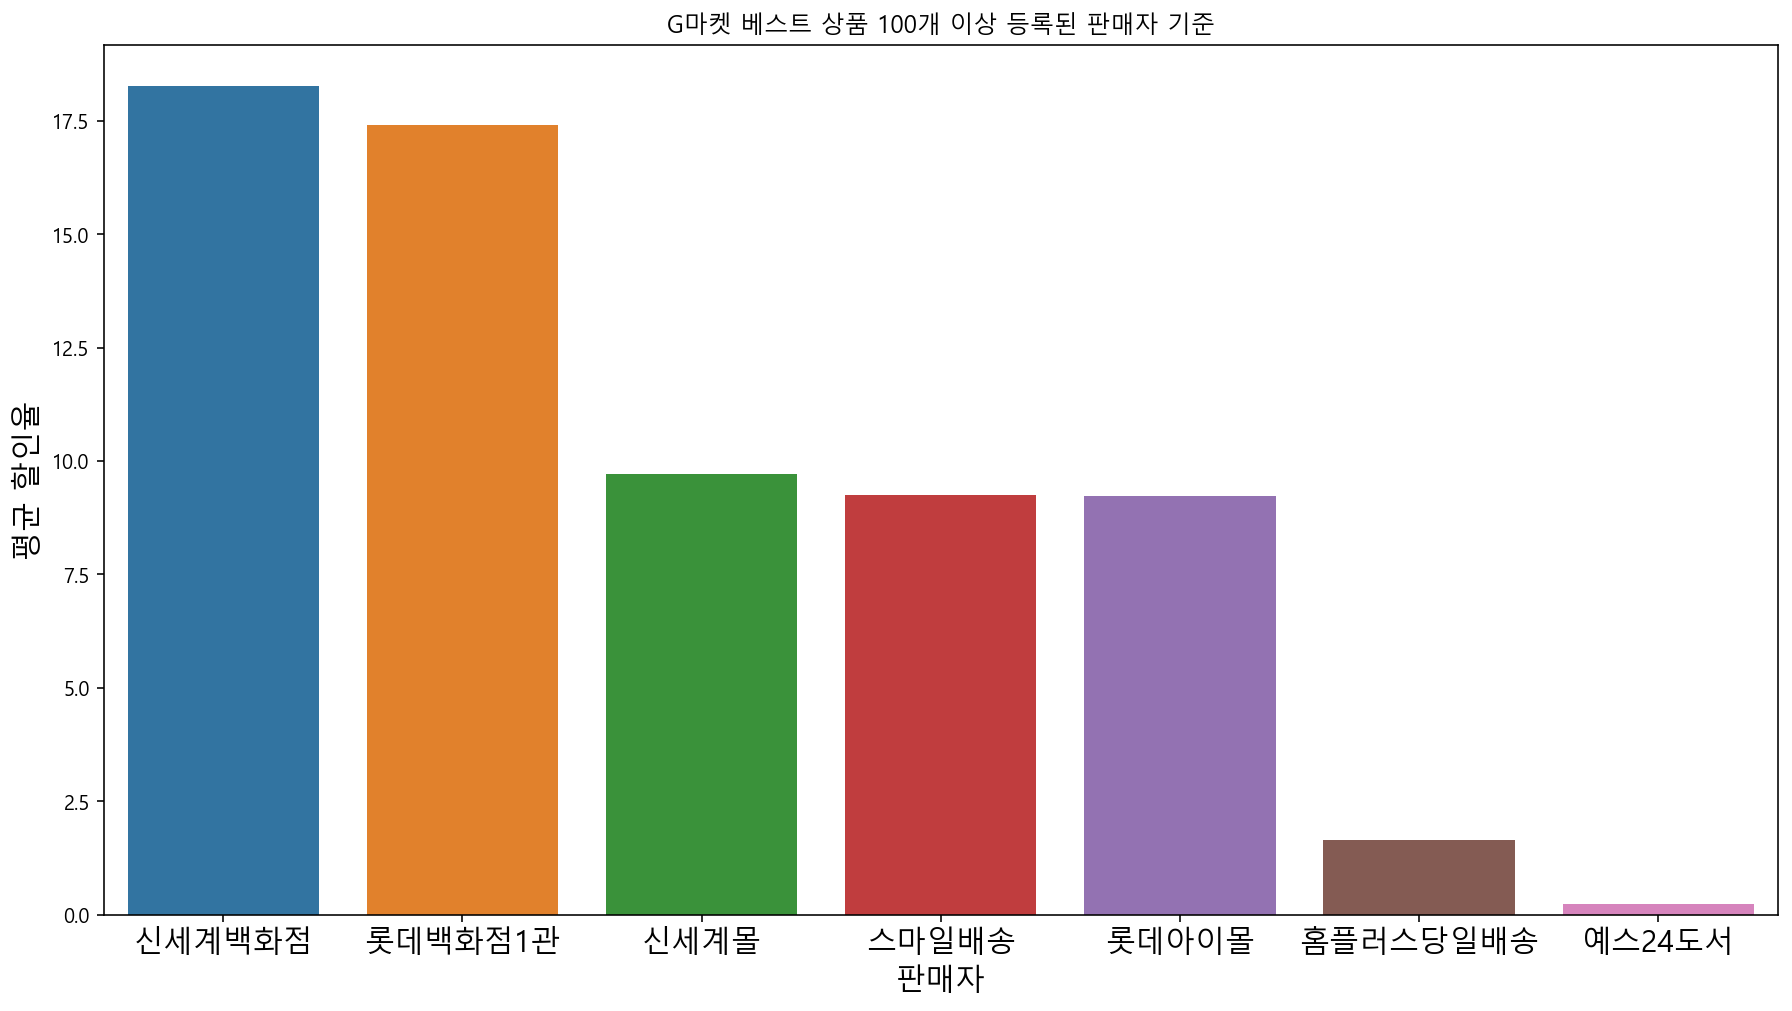

In [125]:
plt.figure(figsize = (15,8))
sns.barplot(data = df.sort_values(by = '평균할인율', ascending=False), ci=None, x = '판매자', y = '평균할인율')


plt.title('G마켓 베스트 상품 100개 이상 등록된 판매자 기준')
plt.xlabel('판매자', fontsize = 15)
plt.ylabel('평균 할인율', fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('평균 할인율 비교.png')

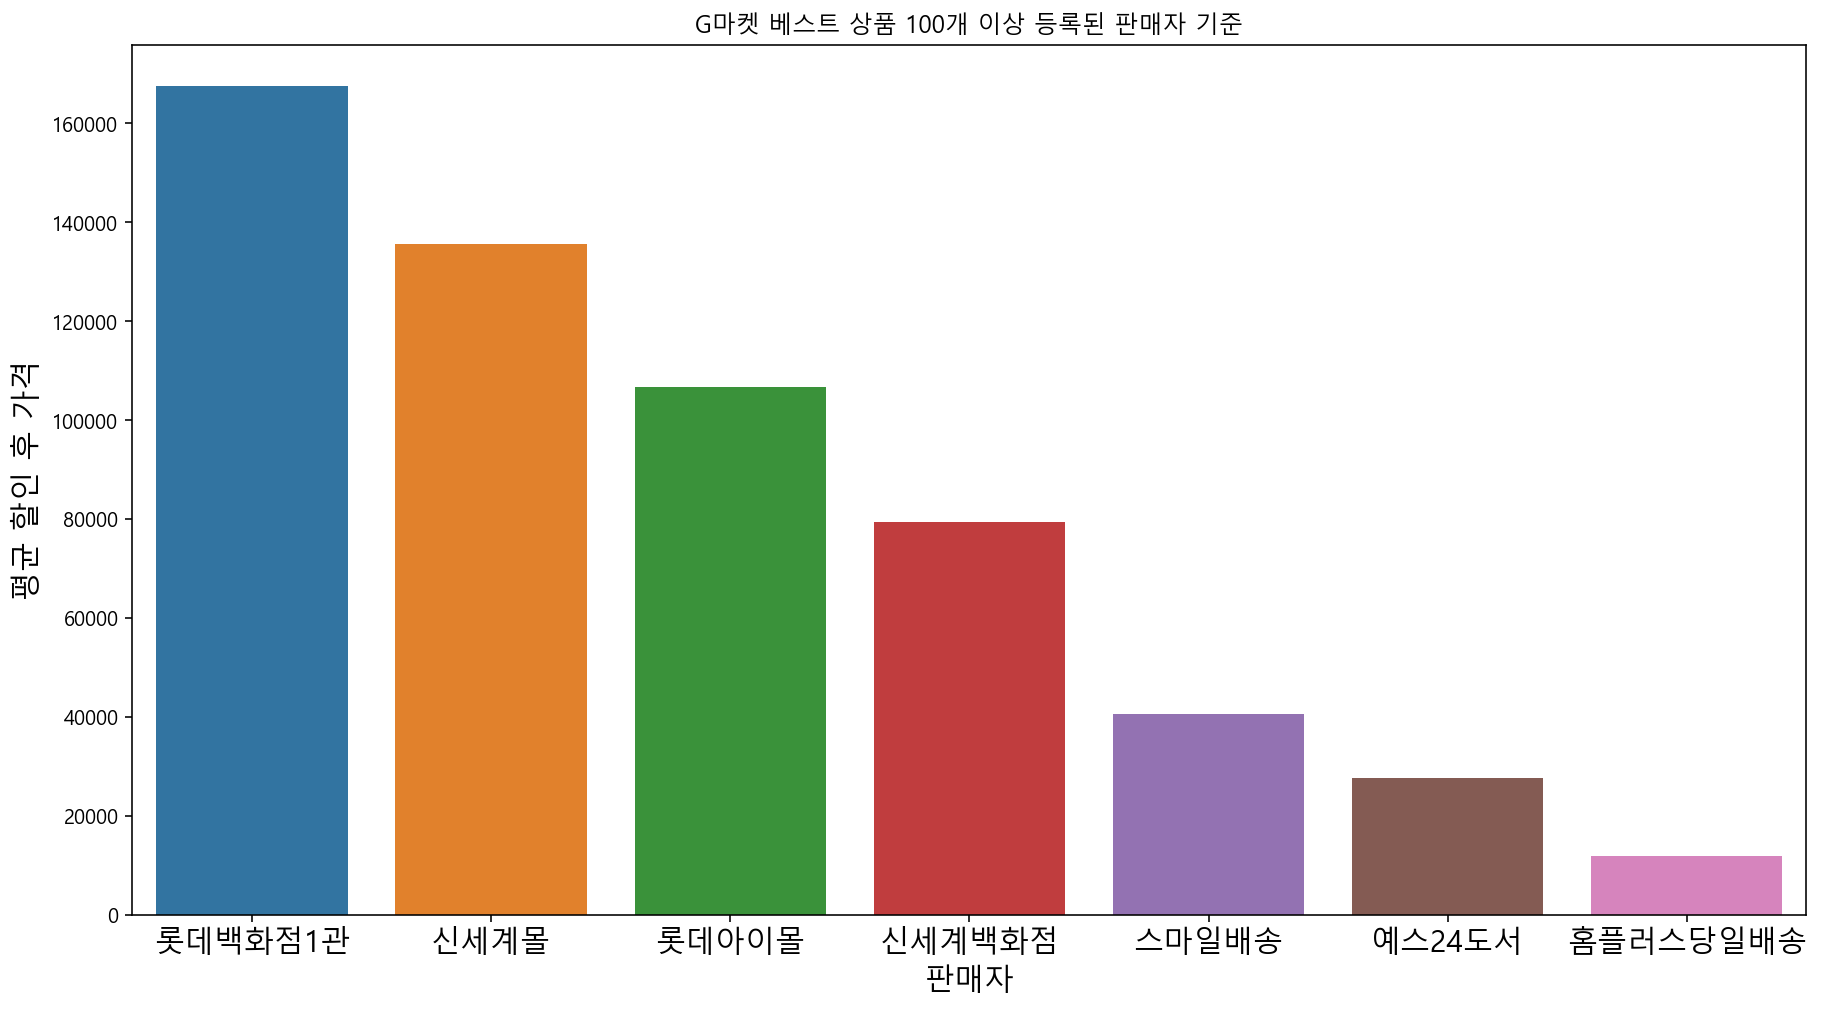

In [126]:
plt.figure(figsize = (15,8))
sns.barplot(data = df.sort_values(by = '평균할인후가격', ascending=False), x = '판매자', y = '평균할인후가격')

plt.title('G마켓 베스트 상품 100개 이상 등록된 판매자 기준')
plt.xlabel('판매자', fontsize = 15)
plt.ylabel('평균 할인 후 가격', fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('평균 할인 후 가격 비교.png')